# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
#Request Weather Data on each city in list cities
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="
city_name = []
city_lat = []
city_lon = []
city_temp = []
city_humidity = []
city_wind_speed = []
city_cloudiness = []

#Use try/except code to skip broken url's

for city in cities:
    try:
        query_url = base_url + weather_api_key + "&q=" + city
        weather_response = requests.get(query_url).json()
        city_name.append(weather_response["name"])
        city_lat.append(weather_response["coord"]["lat"])
        city_lon.append(weather_response["coord"]["lon"])
        city_temp.append(weather_response["main"]["temp"])
        city_humidity.append(weather_response["main"]["humidity"])
        city_wind_speed.append(weather_response["wind"]["speed"])
        city_cloudiness.append(weather_response["clouds"]["all"])
        print(f"Retrieving {city} weather data")
    except:
        print(f"City not found.  Skipping and going to next city.")
    pass

    



Retrieving brae weather data
Retrieving isangel weather data
Retrieving bredasdorp weather data
Retrieving kruisfontein weather data
Retrieving riverton weather data
Retrieving punta arenas weather data
City not found.  Skipping and going to next city.
Retrieving mildura weather data
Retrieving hithadhoo weather data
Retrieving avarua weather data
Retrieving dingle weather data
Retrieving chizhou weather data
City not found.  Skipping and going to next city.
Retrieving busselton weather data
Retrieving butaritari weather data
Retrieving airai weather data
Retrieving lebu weather data
Retrieving ushuaia weather data
Retrieving shelburne weather data
Retrieving zhigansk weather data
Retrieving rikitea weather data
City not found.  Skipping and going to next city.
Retrieving egvekinot weather data
Retrieving dikson weather data
City not found.  Skipping and going to next city.
Retrieving fairbanks weather data
Retrieving kontagora weather data
Retrieving saint-philippe weather data
Retrie

Retrieving yushan weather data
Retrieving huarmey weather data
Retrieving hobyo weather data
City not found.  Skipping and going to next city.
Retrieving peniche weather data
Retrieving banepa weather data
Retrieving keti bandar weather data
Retrieving cedar city weather data
Retrieving garowe weather data
Retrieving svetlyy weather data
Retrieving pacific grove weather data
Retrieving lamin weather data
Retrieving mogadishu weather data
Retrieving ilulissat weather data
Retrieving gladstone weather data
City not found.  Skipping and going to next city.
Retrieving constitucion weather data
Retrieving nakamura weather data
Retrieving yaan weather data
Retrieving vincennes weather data
Retrieving siva weather data
Retrieving severomuysk weather data
Retrieving puksoozero weather data
Retrieving bardiyah weather data
Retrieving port-gentil weather data
Retrieving medina weather data
Retrieving barcelos weather data
Retrieving san patricio weather data
Retrieving ola weather data
Retrievin

Retrieving smirnykh weather data
Retrieving belmonte weather data
Retrieving susangerd weather data
Retrieving baherden weather data
Retrieving jumla weather data
Retrieving enkoping weather data
City not found.  Skipping and going to next city.
Retrieving vestmanna weather data
Retrieving wenling weather data
Retrieving tungor weather data
City not found.  Skipping and going to next city.
Retrieving udachnyy weather data
Retrieving homer weather data
Retrieving green valley weather data
Retrieving kouango weather data
Retrieving berlevag weather data
Retrieving itarema weather data
Retrieving belaya gora weather data
Retrieving winsum weather data
Retrieving chokurdakh weather data
Retrieving avera weather data
Retrieving weihai weather data
City not found.  Skipping and going to next city.
Retrieving alice springs weather data
Retrieving san cristobal weather data
Retrieving praia weather data
Retrieving lourdes weather data
Retrieving alyangula weather data
Retrieving calbuco weathe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
#Convert City Weather Data into Dictionary
city_dict = {
    "City Name": city_name,
    "Latitude": city_lat,
    "Longitude": city_lon,
    "Temperature": city_temp,
    "Humidity": city_humidity,
    "Wind Speed": city_wind_speed,
    "Cloudiness": city_cloudiness
            }

In [26]:
#Convert City Dictionary into a Dataframe
city_df = pd.DataFrame(city_dict)
city_df.head()

,City Name,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,Brae,60.40,-1.35,46.40,87,9.17,20
1,Isangel,-19.55,169.27,87.80,58,13.87,40
2,Bredasdorp,-34.53,20.04,50.00,87,5.82,0
3,Kruisfontein,-34.00,24.73,57.00,93,1.99,1
4,Riverton,40.52,-111.94,30.45,86,10.29,90


In [27]:
#Save City Dataframe as a CSV File in output_data directory
city_df.to_csv("output_data/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
#  Check for cities with Humidity over 100%
humid_check_df = city_df[city_df["Humidity"] > 100]
len(humid_check_df)

0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

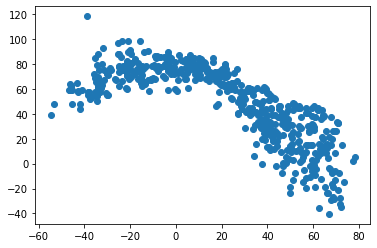

In [29]:
#Plot City Latitude vs. City Temperature and Save as PNG File
plt.scatter(city_df["Latitude"], city_df["Temperature"], marker = "o")
plt.savefig("output_data/latitude_temperature.png")
plt.show()

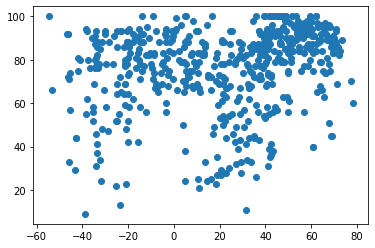

In [30]:
#Plot City Latitude vs. City Humidity and save as PNG File
plt.scatter(city_df["Latitude"], city_df["Humidity"], marker = "o")
plt.savefig("output_data/latitude_humidity.png")
plt.show()

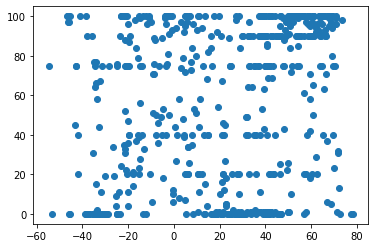

In [31]:
#Plot City Latitude vs. City Cloudiness and save as PNG File
plt.scatter(city_df["Latitude"], city_df["Cloudiness"], marker = "o")
plt.savefig("output_data/latitude_cloudiness.png")
plt.show()

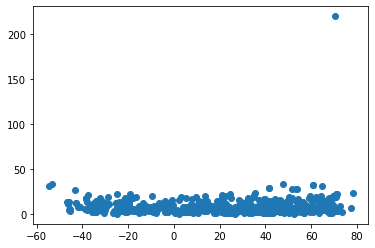

In [32]:
#Plot City Latitude vs. City Windspeed and save as PNG File
plt.scatter(city_df["Latitude"], city_df["Wind Speed"], marker = "o")
plt.savefig("output_data/latitude_windspeed.png")
plt.show()

Linear Regression

In [33]:
#Create Northern Hemisphere Dataframe
northern_df = city_df[city_df["Latitude"] >= 0]
northern_df.head()

,City Name,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,Brae,60.40,-1.35,46.40,87,9.17,20
4,Riverton,40.52,-111.94,30.45,86,10.29,90
9,Dingle,11.00,122.67,82.96,79,14.25,100
10,Chizhou,30.66,117.48,41.29,57,9.64,0
12,Butaritari,3.07,172.79,82.58,79,18.63,74


In [34]:
#Create Southern Hemisphere Dataframe
southern_df = city_df[city_df["Latitude"] < 0]
southern_df.head()

,City Name,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
1,Isangel,-19.55,169.27,87.80,58,13.87,40
2,Bredasdorp,-34.53,20.04,50.00,87,5.82,0
3,Kruisfontein,-34.00,24.73,57.00,93,1.99,1
5,Punta Arenas,-53.15,-70.92,48.09,66,33.33,0
6,Mildura,-34.20,142.15,87.80,31,12.75,77


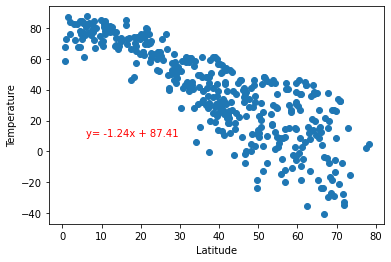

In [35]:
#Northern Hemisphere - Temperature vs. Latitude Linear Regression
x_values = northern_df["Latitude"]
y_values = northern_df["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (6,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

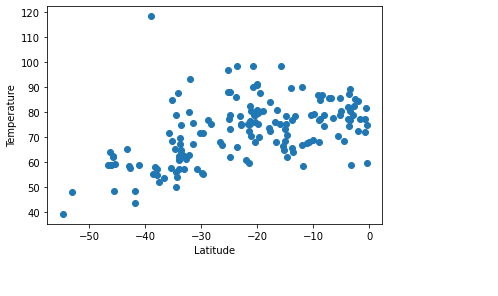

In [36]:
#Southern Hemisphere - Temperature vs. Latitude Linear Regression
x_values = southern_df["Latitude"]
y_values = southern_df["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (6,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

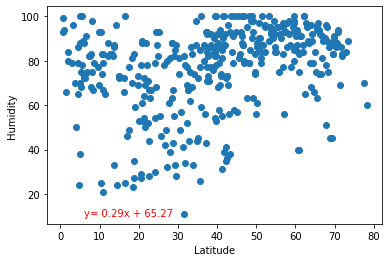

In [37]:
#Northern Hemishere - Humidity vs. Latitude Linear Regression
x_values = northern_df["Latitude"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (6,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

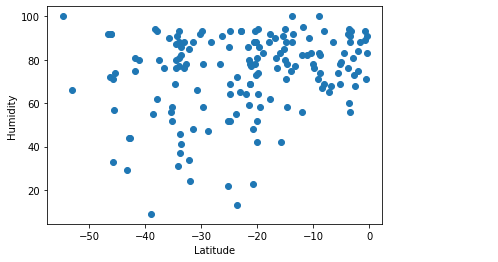

In [38]:
#Southern Hemishere - Humidity vs. Latitude Linear Regression
x_values = southern_df["Latitude"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (6,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

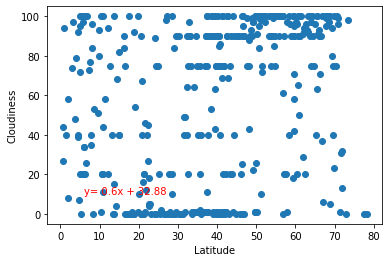

In [39]:
#Northern Hemisphere - Cloudiness vs. Latitude Linear Regression
x_values = northern_df["Latitude"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (6,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

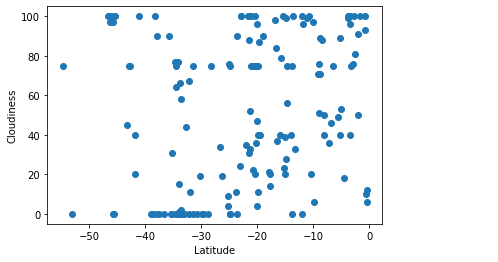

In [40]:
#Southern Hemisphere - Cloudiness vs. Latitude Linear Regression
x_values = southern_df["Latitude"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (6,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

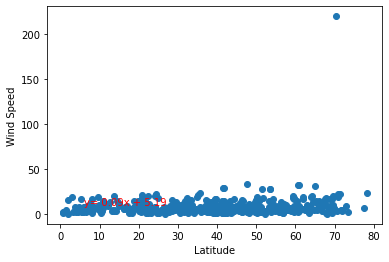

In [41]:
#Northern Hemisphere - Wind Speed vs. Latitude Linear Regression
x_values = northern_df["Latitude"]
y_values = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (6,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

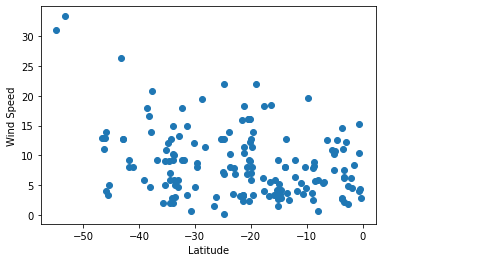

In [42]:
#Southern Hemisphere - Wind Speed vs. Latitude Linear Regression
x_values = southern_df["Latitude"]
y_values = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (6,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()